In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
pd.set_option('max_columns', None)

In [315]:
df = pd.read_csv("./datasets/database.csv", low_memory=False)
df = df.drop(["Record ID", "Agency Code", "Agency Name"], axis=1)
df.head(10)

,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,Yes,Female,99,White,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,Male,32,White,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [316]:
df.shape

(638454, 21)

In [317]:
df.corr()

,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Year,1.000000,0.124125,0.005514,0.026765,0.055959
Incident,0.124125,1.000000,-0.006918,0.001781,0.001951
Victim Age,0.005514,-0.006918,1.000000,-0.008047,-0.017289
Victim Count,0.026765,0.001781,-0.008047,1.000000,0.067284
Perpetrator Count,0.055959,0.001951,-0.017289,0.067284,1.000000


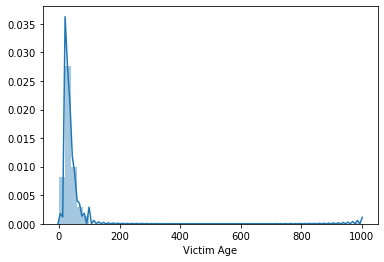

In [318]:
sns.distplot(df["Victim Age"])

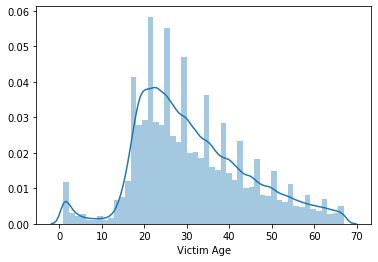

In [338]:
q25,q75 = df["Victim Age"].quantile([.25,.75])
iqr = q75 - q25
minimo = q25 - 1.5 * iqr
maximo = q75 + 1.5 * iqr
df = df[df["Victim Age"].between(minimo, maximo)]
sns.distplot(df["Victim Age"])

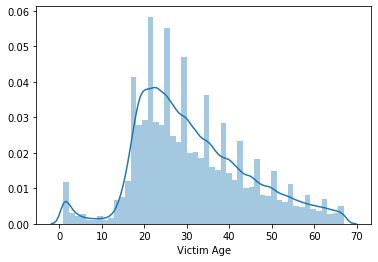

In [353]:
# df = df[~(df["Victim Age"] == 0)]
mask = df["Victim Age"] == 0
df = df[~mask]
sns.distplot(df["Victim Age"])

/Users/danteulisesrangelrobles/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-289-3bb3091a0477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Perpetrator Age"][mask] = 0
/Users/danteulisesrangelrobles/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-289-3bb3091a0477>:3: Setti

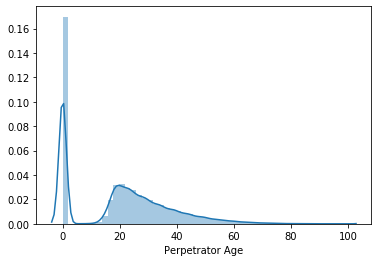

In [289]:
mask = df["Perpetrator Age"] == ' '
df["Perpetrator Age"][mask] = 0
df["Perpetrator Age"] = df['Perpetrator Age'].astype(int)
mask = df["Victim Age"] == ' '
df["Victim Age"][mask] = 0
df["PerpetVictimrator Age"] = df['Victim Age'].astype(int)

sns.distplot(df["Perpetrator Age"])

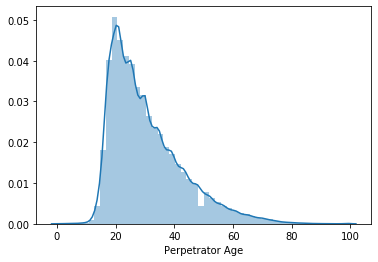

In [265]:
mask = (df["Perpetrator Age"] == 0)== True
df = df[mask == False] 
mask = (df["Victim Age"] == 0)== True
df = df[mask == False] 

sns.distplot(df["Perpetrator Age"])

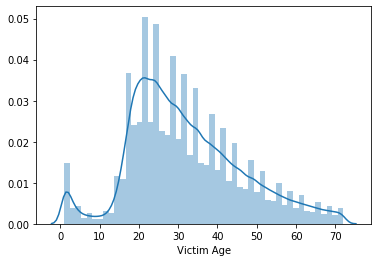

In [266]:
sns.distplot(df["Victim Age"])